# Tello Vision Telemetry Lab

## Drone IMU Odometry 

### Description: IMU velocities integration using telemetry timestamp. 2D drone tracks, IMU yaw and tof heigth data fusion for camera pose and 3D tracks.


See data explanation at [the end of the notebook](#data-explanation).

### Index:
* [Telemetry Analysis Setup](#analysis-setup)
* [Odometry integration and display all 2D tracks ](#all-tracks)
* [Display tracks by tracking mode or telemetry sequential ID](#track-filter)
* [Select a track for the ongoing analysis](#track-selection)
* [IMU Odometry track with Camera orientation from IMU yaw data](#drone-track)
* [3D IMU Odometry track with Camera orientation from IMU yaw data and heigth from tof sensor data](#3d-track)
* [IMU pitch, roll, yaw, vx, vy, vz and tof sensor data inspection](#sensor-inspection)
* [Telemetry Data Explanation](#data-explanation)
* [Telemetry Data Filtering](#data-filtering)

### Telemetry Analysis Setup <a class="anchor" id="analysis-setup"></a>

In [1]:
#Import Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#Read Telemetry data
df = pd.read_csv('data/tv_telemetry_210325_122021_isonzo_4.txt',decimal=".")
df.tail(2)

,timestamp,trackMode,telSeqId,personCount,personConfidence,faceXPx,faceYPx,faceRadiusPx,angle_err,estimatedDistance,...,Uy,pitch,roll,yaw,vx,vy,vz,tof,batt,temp
2709,315429,0,0,0,63,477,190,0,0,55,...,0,9,3,-4,0,0,0,10,12,69
2710,315530,0,0,0,63,477,190,0,0,55,...,0,9,3,-4,0,0,0,10,12,69


In [3]:
#Extract data columns
timestamp=df["timestamp"]
trackMode=df["trackMode"]
telSeqId=df["telSeqId"]
personCount=df["personCount"]
personConfidence=df["personConfidence"]
faceXPx=df["faceXPx"]
faceYPx=df["faceYPx"]
faceRadius=df["faceRadiusPx"]
theta=df["angle_err"]
estimatedDistance=df["estimatedDistance"]
yPos=df["estimatedYPos"]
Uyaw=df["Uyaw"]
Ux=df["Ux"]
Uy=df["Ux"]
Uz=df["Uz"]
pitch=df["pitch"]
roll=df["roll"]
yaw=df["yaw"]
vx=df["vx"]
vy=df["vy"]
vz=df["vz"]
tof=df["tof"]
batt=df["batt"]
temp=df["temp"]


In [4]:
#Figures dpi
dpiSelected=72

### Odometry integration and display all 2D tracks <a class="anchor" id="all-tracks"></a>

In [5]:
#Odometry integration from IMU velocity and timestamp
timeS=(timestamp)/1000
deltaTimeS=np.diff(timeS)

distanceX=np.cumsum(10*vy[1:len(vy)]*deltaTimeS)
distanceY=np.cumsum(10*vx[1:len(vx)]*deltaTimeS)
distanceZ=np.cumsum(10*vz[1:len(vz)]*deltaTimeS)

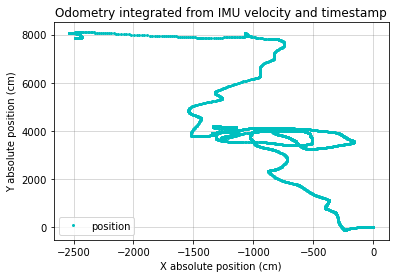

In [9]:
#Display all 2D tracks
%matplotlib inline
plt.plot(distanceX,distanceY,'co',ms=2)
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry integrated from IMU velocity and timestamp')
plt.legend(['position'],loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/IMU-odometry/imu-odometry.jpg",dpi=dpiSelected)
plt.show()

### Display tracks by tracking mode or telemetry sequential ID <a class="anchor" id="track-filter"></a>

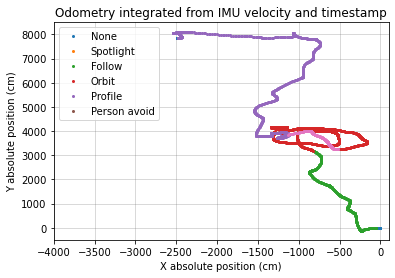

In [10]:
#Display odometry track by trackMode (computer vision tracking mode) 
%matplotlib inline
plt.plot(distanceX[trackMode==0],distanceY[trackMode==0],'o',ms=2)
plt.plot(distanceX[trackMode==1],distanceY[trackMode==1],'o',ms=2)
plt.plot(distanceX[trackMode==2],distanceY[trackMode==2],'o',ms=2)
plt.plot(distanceX[trackMode==3],distanceY[trackMode==3],'o',ms=2)
plt.plot(distanceX[trackMode==4],distanceY[trackMode==4],'o',ms=2)
plt.plot(distanceX[trackMode==5],distanceY[trackMode==5],'o',ms=2)
plt.plot(distanceX[trackMode==6],distanceY[trackMode==6],'o',ms=2)
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry integrated from IMU velocity and timestamp')
plt.legend(['None','Spotlight','Follow','Orbit','Profile','Person avoid'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)

plt.xlim(-4000,100)
plt.ylim(-500,8500)
plt.savefig("out/jpg/imu-odometry/imu-odometry-trackMode.jpg",dpi=dpiSelected)
plt.show()

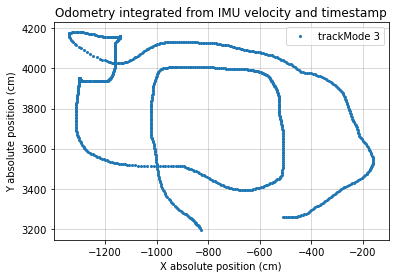

In [13]:
#Select tracking Mode to display
# 0 -> None
# 1 -> Spotlight
# 2 -> Follow
# 3 -> Orbit
# 4 -> Profile
# 5 -> Party
# 6 -> Go forward with Person Avoidance
mode=3 
%matplotlib inline
plt.plot(distanceX[trackMode==mode],distanceY[trackMode==mode],'o',ms=2,label='trackMode {0:d}'.format(mode))
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry integrated from IMU velocity and timestamp')
plt.legend(loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/imu-odometry/imu-odometry-trackMode-selected.jpg",dpi=dpiSelected)
plt.show()

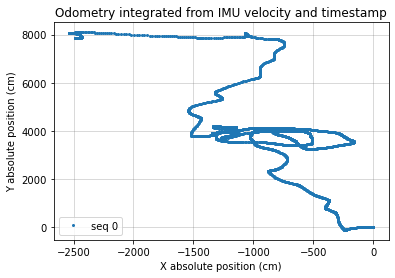

In [14]:
#Display odometry track by telSeqId (Sequential Id marked during the flight)
%matplotlib inline
N=np.max(telSeqId)
for i in range(N+1):
    plt.plot(distanceX[telSeqId==i],distanceY[telSeqId==i],'o',ms=2,label='seq {:d}'.format(i))
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry integrated from IMU velocity and timestamp')

plt.legend(loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/imu-odometry/imu-odometry-by-telSeqId.jpg",dpi=dpiSelected)
plt.show()

### Select a track for the ongoing analysis  <a class="anchor" id="track-selection"></a>

In [29]:
#This track will be used for the rest of the analysis
selectedTrack=(trackMode==3)

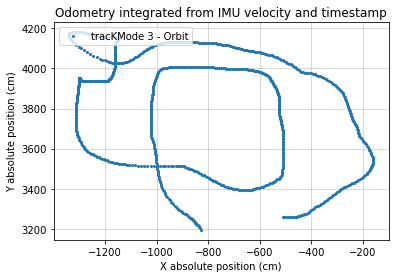

In [31]:
#Display selected track
%matplotlib inline

plt.plot(distanceX[selectedTrack],distanceY[selectedTrack],'o',ms=2,label='tracKMode {0:d} - Orbit'.format(3))
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry integrated from IMU velocity and timestamp')
plt.legend(loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/imu-odometry/imu-odometry-telSeqId.jpg",dpi=dpiSelected)
plt.show()

### IMU Odometry track with Camera orientation from IMU yaw data <a class="anchor" id="drone-track"></a>

In [35]:
#IMU Odometry track with Camera orientation for the selected track
timeS=(timestamp[selectedTrack])/1000
vxSeq=vx[selectedTrack]
vySeq=vy[selectedTrack]
deltaTimeS=np.diff(timeS)

yawSeq=yaw[selectedTrack]
distanceXSeq=np.cumsum(10*vySeq[1:len(vySeq)]*deltaTimeS)
distanceYSeq=np.cumsum(10*vxSeq[1:len(vxSeq)]*deltaTimeS)
#personCountSeq=np.array(personCount[telSeqId==seqId])
cameraXSeq=distanceXSeq+30*np.sin((yawSeq[1:len(yawSeq)])*np.pi/180)
cameraYSeq=distanceYSeq+30*np.cos((yawSeq[1:len(yawSeq)])*np.pi/180)

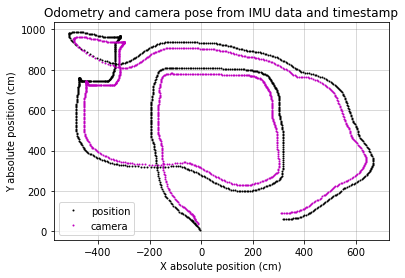

In [36]:
%matplotlib inline
plt.plot(distanceXSeq,distanceYSeq,'ko',ms=1)
plt.plot(cameraXSeq,cameraYSeq,'mo',ms=1)
plt.xlabel('X absolute position (cm)')
plt.ylabel('Y absolute position (cm)')
plt.title('Odometry and camera pose from IMU data and timestamp')
plt.legend(['position','camera'],loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/imu-odometry/odometry-camera-pose.jpg",dpi=dpiSelected)
plt.show()

### 3D IMU Odometry track with Camera orientation from IMU yaw data and heigth from tof sensor data <a class="anchor" id="3d-track"></a>


<IPython.core.display.Javascript object>


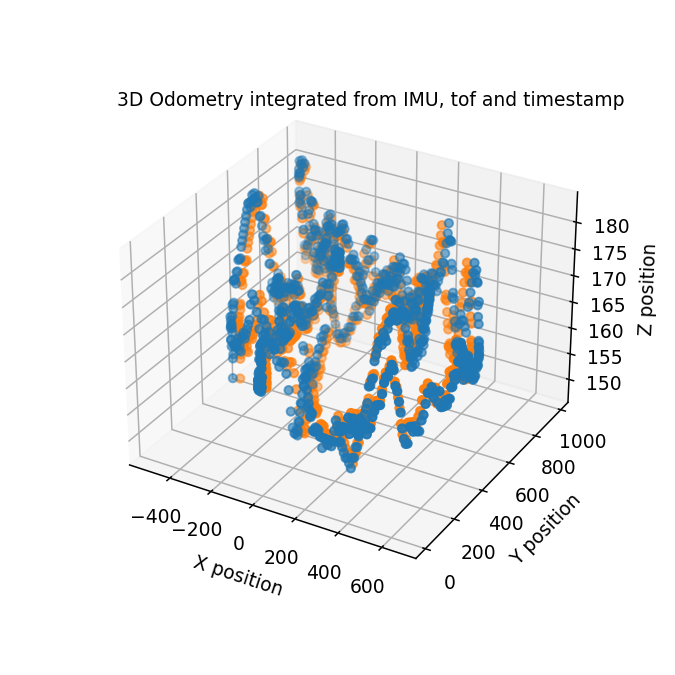

In [39]:
%matplotlib notebook
fig4 = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
thetaf=np.array(theta[selectedTrack])
yawf=np.array(yaw[selectedTrack])
estimatedDistancef=np.array(estimatedDistance[selectedTrack])
toff=np.array(tof[selectedTrack])
yPosf=np.array(yPos[selectedTrack])

zdrone = toff[1:len(toff)]
xdrone = distanceXSeq
ydrone = distanceYSeq
zcamera = toff[1:len(toff)]
xcamera = cameraXSeq
ycamera = cameraYSeq

ax.scatter3D(xdrone, ydrone, zdrone)
ax.scatter3D(xcamera, ycamera, zcamera)
ax.text2D(0.05, 0.95, "3D Odometry integrated from IMU, tof and timestamp", transform=ax.transAxes)
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_zlabel('Z position')
plt.savefig("out/jpg/imu-odometry/odometry-camera-pose-tof.jpg",dpi=200)

### IMU pitch, roll, yaw, vx, vy, vz and tof sensor data inspection <a class="anchor" id="sensor-inspection"></a>

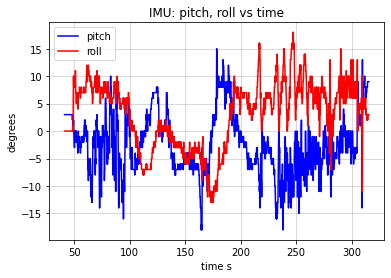

In [40]:
# IMU pitch roll
%matplotlib inline
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r')
plt.ylabel('degrees')
plt.xlabel('time s')
plt.title('IMU: pitch, roll vs time')
plt.legend(['pitch','roll'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

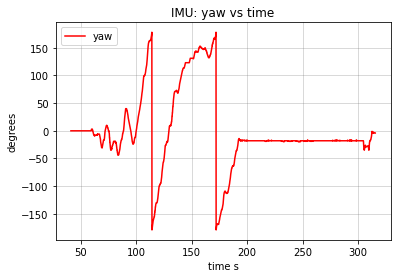

In [41]:
# IMU yaw
plt.plot(timestamp/1000,yaw,'r')
plt.ylabel('degrees')
plt.xlabel('time s')
plt.title('IMU: yaw vs time')
plt.legend(['yaw'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

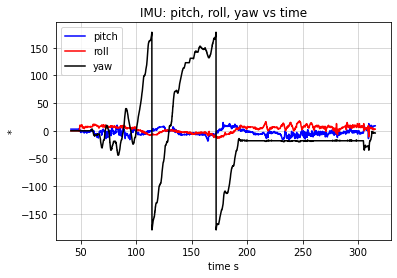

In [42]:
# IMU pitch, roll and yaw
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r',timestamp/1000,yaw,'k')
plt.ylabel('*')
plt.xlabel('time s')
plt.title('IMU: pitch, roll, yaw vs time')
plt.legend(['pitch','roll','yaw'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

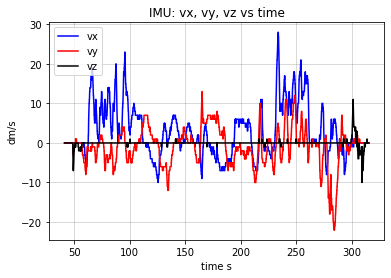

In [43]:
# IMU vx, vy, vz velocities
plt.plot(timestamp/1000,vx,'b',timestamp/1000,vy,'r',timestamp/1000,vz,'k')
plt.ylabel('dm/s')
plt.xlabel('time s')
plt.title('IMU: vx, vy, vz vs time')
plt.legend(['vx','vy','vz'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

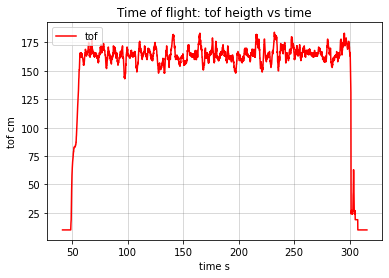

In [44]:
# Time of flight (tof) data
plt.plot(timestamp/1000,tof,'r')
plt.xlabel('time s')
plt.ylabel('tof cm')
plt.title('Time of flight: tof heigth vs time')
plt.legend(['tof'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.show()

## Telemetry Data Explanation <a class="anchor" id="data-explanation"></a>

### timestamp 
Data timestamp (milliseconds).

### trackMode
Tracking Mode coded as follows:

0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

### telSeqId
An incremental number used to manually mark flight phases. Use the Tello Vision 1D app button "Tel ID ++" to mark sequences of interest.

### personCount
Detected person count.

### personConfidence
Detection confidence for the foreground person (%).

### faceXPx, faceYPx, faceRadiusPx
Detection center and apparent face radius for the foreground person (pixels).

### angle_err
Horizontal angle error between the detected face and the center of the image (degrees)

### estimatedDistance
3D Distance between the drone and the detected face (cm).

### estimatedXPos, estimatedYPos, estimatedZPos
estimatedDistance decomposed in the (X,Y,Z) drone frame reference (cm).

X is in the drone right direction, Y is in the drone down direction, Z is in the drone forward direction.

### Uyaw, Uz, Ux, Uy
Speed commands sent to the drone (approximated deg/s and cm/s)

### pitch, roll, yaw
Eulerian angles from the IMU (degrees).

### vx, vy, vz
Velocities from the IMU (decimeter/s).

X is drone's initial forward direction, Y is drone's initial right direction, Z is drone's down direction.

### tof
Drone height from the Time Of Flight sensor (cm).

### batt
Drone battery level (%).

### temp
Drone temperature (°C).

## Telemetry Data Filtering <a class="anchor" id="data-filtering"></a>
Displaying many minutes of telemetry data all in the same plot can be difficult to interpret.
The key is to filter and select data to make the analysis simpler.
It is possible to leverage Python powerful Pandas Data Analysis Library and Tello Vision Telemetry Lab data columns definition.
For example, the trackMode column classifies data by the flight tracking mode active in each moment.
Autonomous tracking modes are coded as follows:
0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

So the following lines  of code:

*tofFollow=(tof[trackMode==2])*

*tofOrbit=(tof[trackMode==3])*

select only Time of Flight data of the Follow mode and the Orbit mode giving the possibility to plot them in two separate figures.